## Preparing the data

We are going to use a dataset of simulated ATLAS events that may contain a Higgs event, that was used for a Machine Learning competition at Kaggle. If yuu are running from Kaggle, you have to accept the terms of the competition (even if you don't make a submission) and you'll have a sample of 250000 labelled events compressed as a `zip` file. If you use the [CERN dataset](https://opendata.cern.ch/record/328), you will have a sample of 818238 labelled events compressed as a `gz` file. Luckily, `pandas` can read compressed files with the argument `compression='zip'` or `compression='gzip'` respectively.

In [1]:
import pandas as pd

df_train = pd.read_csv(r"atlas-higgs-challenge-2014-v2.csv.gz", compression='gzip')

df_train.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label,KaggleSet,KaggleWeight
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2.150,0.444,46.062,1.24,-2.475,113.497,0.000814,s,t,0.002653
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,0.725,1.158,-999.000,-999.00,-999.000,46.226,0.681042,b,t,2.233584
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,2.053,-2.028,-999.000,-999.00,-999.000,44.251,0.715742,b,t,2.347389
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,1.660654,b,t,5.446378
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1.904263,b,t,6.245333


In [2]:
df_train.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,KaggleWeight
count,818238.000000,818238.000000,818238.000000,818238.000000,818238.000000,818238.000000,818238.000000,818238.000000,818238.000000,818238.000000,...,818238.000000,818238.000000,818238.000000,818238.000000,818238.000000,818238.000000,818238.000000,818238.000000,818238.000000,818238.000000
mean,509118.500000,-48.819019,49.252714,81.140561,57.849524,-707.740880,-600.191191,-708.681306,2.373871,18.969617,...,0.979923,-348.757840,-399.693294,-399.703858,-691.626111,-708.442206,-708.443312,73.205594,0.503144,2.012577
std,236205.109118,406.118397,35.378609,40.582708,63.411938,454.793899,658.724040,453.328599,0.780875,21.918491,...,0.978793,533.097006,489.428560,489.420013,480.274744,453.699150,453.697158,98.331754,0.572200,5.439641
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.000461,0.000839
25%,304559.250000,78.166000,19.304000,59.414000,14.164250,-999.000000,-999.000000,-999.000000,1.814000,2.839000,...,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.005721,0.010415
50%,509118.500000,105.061000,46.484000,73.744000,38.470000,-999.000000,-999.000000,-999.000000,2.492000,12.383000,...,1.000000,38.965000,-1.865000,-2.105000,-999.000000,-999.000000,-999.000000,40.506000,0.357223,0.806562
75%,713677.750000,130.730000,73.620000,92.188000,79.226750,0.499000,84.031750,-4.548000,2.962000,27.634000,...,2.000000,75.470750,0.432000,0.489000,33.800000,-2.436000,-2.265000,110.387000,0.733462,2.360271
max,918237.000000,1949.261000,968.669000,1349.351000,2834.999000,8.724000,4974.979000,17.650000,5.751000,2834.999000,...,3.000000,1163.439000,4.500000,3.142000,817.801000,4.500000,3.142000,1860.175000,2.386316,106.908407


In [3]:
df_train.columns

Index(['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt',
       'Weight', 'Label', 'KaggleSet', 'KaggleWeight'],
      dtype='object')

The first column, `EventId`, is just an identifier of each event, and doesn't contain any info. `Weight` is a parameter of the event simulation, and shouldn't be used. And finally `Label` is the label that we want to learn. `KaggleSet` and `KaggleWeight` tells if the data was used as training or scoring during the original competition. So we remove those columns:

In [4]:
features = df_train.columns[1:-4]

In [5]:
features

Index(['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis',
       'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt'],
      dtype='object')

In [6]:
X_train = df_train[features]
print(X_train.loc[3])

DER_mass_MMC                   143.905
DER_mass_transverse_met_lep     81.417
DER_mass_vis                    80.943
DER_pt_h                         0.414
DER_deltaeta_jet_jet          -999.000
DER_mass_jet_jet              -999.000
DER_prodeta_jet_jet           -999.000
DER_deltar_tau_lep               3.310
DER_pt_tot                       0.414
DER_sum_pt                      75.968
DER_pt_ratio_lep_tau             2.354
DER_met_phi_centrality          -1.285
DER_lep_eta_centrality        -999.000
PRI_tau_pt                      22.647
PRI_tau_eta                     -1.655
PRI_tau_phi                      0.010
PRI_lep_pt                      53.321
PRI_lep_eta                     -0.522
PRI_lep_phi                     -3.100
PRI_met                         31.082
PRI_met_phi                      0.060
PRI_met_sumet                   86.062
PRI_jet_num                      0.000
PRI_jet_leading_pt            -999.000
PRI_jet_leading_eta           -999.000
PRI_jet_leading_phi      

This is a problem of binary classification: `Label` takes the values `s` (signal) or `b` (background). We are going to transform it into a regression problem by assigning the value 1.0 to `s` and 0.0 to `b`:

In [7]:
Y_train = (df_train['Label'] == 's').apply(float)
print(Y_train.loc[3])

0.0


## Training your model

Now it is the time for you to implement your Machine Learning model. Don't forget to split the data into a training and validation datasets. Try different parameters of the ML model until you are content with the results.

## Binary classification

Once that you have an approximation for the score of each event, it is time to put it to good use and classify your validation data between `s` and `b` . A simple approach would be to assign all the event with score > 0.5 to `s` and the rest to `b`. But is this the right threshold to split the data? Let's see with a ROC (receiver operating characteristic) curve.

For each possible threshold, we will compute two quantities: the True Positive Rate (TPR), which is the ratio of correctly-identified `s` events divided by the total number of `s` events, and the False Positive Rate (FPR), which is the ratio of events miss-identified as `s` (type-I error) divided by the total number of `b` events. We will plot the FPR in the $x$-axis and TPR in the $y$-axis of the ROC curve. The ROC represents the trade-off between thresholds that identify most of the signal events but can also miss-identify some background as signal, and the thresholds that correctly identify the background but ignore some signal events.

In [8]:
import numpy as np
import matplotlib.pyplot as plt

events_example = ['s', 's', 'b', 's', 'b', 'b', 'b', 's', 'b', 's', 's', 'b']
scores_example = [0.93, 0.75, 0.32, 0.28, 0.81, 0.14, 0.34, 0.61, 0.27, 0.94, 0.53, 0.63]

In [9]:
fpr = []
tpr = []
num_s = 6
num_b = 6

for threshold in np.linspace(0.0, 1.0, 50):
    tp = 0
    fp = 0
    for i in range(12):
        if scores_example[i] > threshold: # Event identified as signal
            if events_example[i] == 's': # It was really signal (true positive)
                tp += 1
            else: # It was actually background
                fp += 1
    tpr.append(tp/num_s)
    fpr.append(fp/num_b)

(0.0, 1.0)

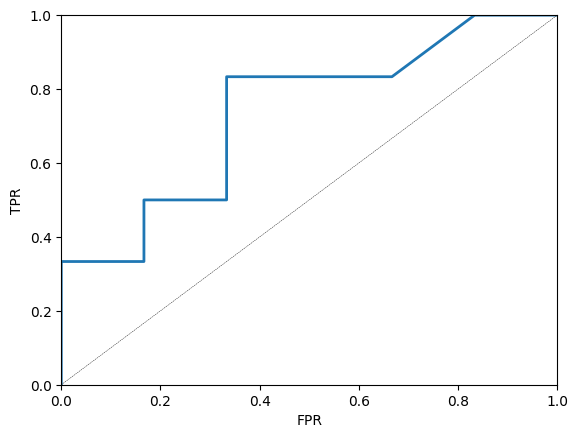

In [10]:
plt.plot(fpr, tpr, lw=2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot([0,1], [0,1], c='k', ls='dashed', lw=0.3)
plt.xlim([0,1])
plt.ylim([0,1])

A perfect classifier would have `TPR=1` and `FPR=0`, and would be represented by a dot in the upper-left corner of the plot. The other extreme case is a random classifier, that would lie on the diagonal `TPR=FPR` of the plot. If the model is below that diagonal, it means that the classification is worse than random chance -- but you can still get a good prediction just by reversing the `s` and `b` labels.

A useful statistic test is the Area Under the Curve (AUC) of the ROC. An `AUC` close to 1 indicates that the model is able to distinguish between signal and noise, while an `AUC` close to 0.5 corresponds to random guess.

Let's integrate the AUC using the trapezoid rule:

In [11]:
auc = 0

for i in range(len(fpr)-1):
    auc += (fpr[i]-fpr[i+1])*(tpr[i]+tpr[i+1])/2
    
print(auc)

0.7361111111111113


Now that we are convinced that our model is able to classify the data, let us choose the threshold that provides the best classification. There is no clear method, as the severity of false-positives and false-negatives depend on the application (for example, a false-negative in a cancer diagnosis is much worse than in a particle collider).

One option, if both false-positives and false-negatives are equally discouraged, is to pick the threshold that maximizes `TPR-FPR`

Text(0, 0.5, 'TPR-FPR')

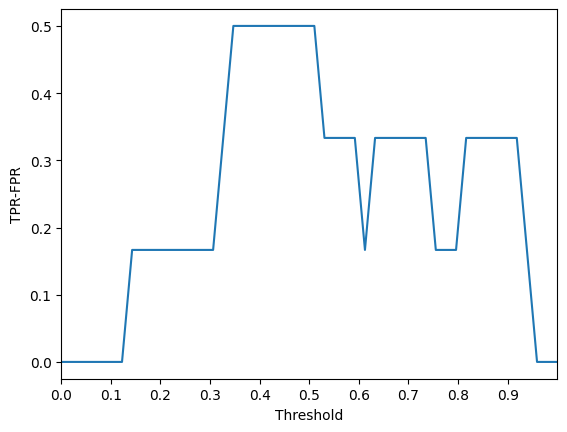

In [12]:
plt.plot(np.linspace(0.0, 1.0, 50), np.array(tpr)-np.array(fpr))
plt.xlim([0, 1])
_ = plt.xticks(np.arange(0.0, 1.0, 0.1))
plt.xlabel('Threshold')
plt.ylabel('TPR-FPR')

For the CERN dataset, we actually have a criterion that determines the trade-off between false-positives and false-negatives, given by

$$\mathrm{AMS} = \sqrt{2}\sqrt{(n_S + n_B + 10) \ln\left(1+\frac{n_S}{n_B+10}\right)-n_S}$$

where $n_S$ and $n_B$ are the weighted total number of true-positives and false.positives, using the weights in the column `Weight`

In [13]:
weights_example = [0.27, 2.38, 4.17, 0.24, 3.47, 1.66, 0.84, 5.29, 2.03, 4.21, 2.26, 0.07]

In [14]:
n_s = []
n_b = []

for threshold in np.linspace(0.0, 1.0, 50):
    s = 0
    b = 0
    for i in range(12):
        if scores_example[i] > threshold: # Point identified as signal
            if events_example[i] == 's': # It was really signal (true positive)
                s += weights_example[i]
            else: # it was actually background
                b += weights_example[i]
    n_s.append(s)
    n_b.append(b)

In [15]:
AMS = []
for i in range(50):
    AMS.append(np.sqrt(2)*np.sqrt((n_s[i]+n_b[i]+10)*np.log(1+n_s[i]/(n_b[i]+10))-n_s[i]) )

Text(0, 0.5, 'AMS')

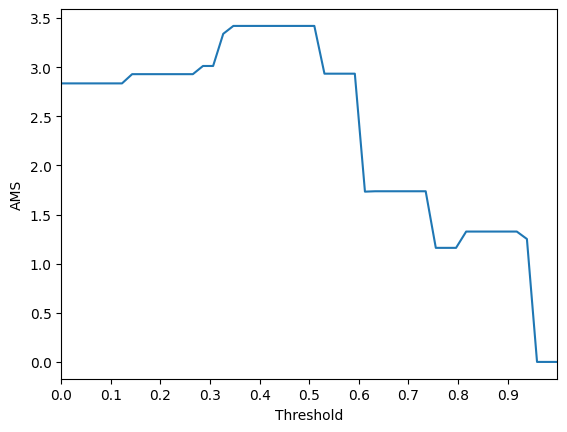

In [16]:
plt.plot(np.linspace(0.0, 1.0, 50), AMS)
plt.xlim([0, 1])
_ = plt.xticks(np.arange(0.0, 1.0, 0.1))
plt.xlabel('Threshold')
plt.ylabel('AMS')

### Tasks

* Train different ML models and select their parameters (learning rates, number of trees, etc.) to get a good regression to the scores without overfitting.
* For several of these models (at least one NN and one tree model) plot the ROC curve and compute the AUC, and compare the results.
* For each of the selected models, choose the threshold that has the better trade-off between TPR-FPR, and the threhold that maximizes AMS. Plot them in the corresponding ROC curve.
* BONUS Task: since you have trained several models, maybe you could combine them to create an even better prediction.
    * Start by making a histogram for the difference of scores between each pair of models. Do the models generally agree?
    * Take the two best models and try to combine their results. A simple way to do this is by averaging their scores. Try also a weighted average. Compute the ROC curve, AUC and optimal thresholds for the combined model.

Definimos la red neuronal:

In [17]:
import torch
import xgboost
import pandas as pd
print(len(features))
class MyNet(torch.nn.Module):
    def __init__(self):
        super(MyNet, self).__init__()
        self.lin1 = torch.nn.Linear(len(features),10) 
        self.lin2 = torch.nn.Linear(10,7) 
        self.lin3 = torch.nn.Linear(7, 20) 
        self.lin4 = torch.nn.Linear(20,5) 
        self.lin5 = torch.nn.Linear(5, 1) 


    def forward(self, x):
        x = self.lin1(x) # We apply the first linear transformation
        x = torch.nn.functional.leaky_relu(x) # And a leaky ReLU
        x = self.lin2(x) # The second linear transformation
        x = torch.nn.functional.leaky_relu(x) # And a leaky ReLU
        x = self.lin3(x) # The third linear transformation
        x = torch.nn.functional.leaky_relu(x) # And a leaky ReLU
        x = self.lin4(x) # The second linear transformation
        x = torch.nn.functional.leaky_relu(x) # And a leaky ReLU
        x = self.lin5(x) # The third linear transformation
        return ((torch.tanh(x)/2)+0.5) # Our output will be values centered around 0

30


In [18]:
import random

class HiggsDataSetNN(torch.utils.data.Dataset):
    def __init__(self, device='cpu'):
        super().__init__()
        self.X = torch.tensor(X_train[features].values, dtype=torch.float32, device=device)
        self.Y = torch.tensor(Y_train.values, dtype=torch.float32, device=device)
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx]
Higgsset = HiggsDataSetNN()
train_data, test_data = torch.utils.data.random_split(Higgsset, [0.8, 0.2])
train_dataloader = torch.utils.data.DataLoader(train_data, batch_size=100, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size=100)
print(len(train_data))


654591


In [19]:
print(torch.cuda.is_available())

NN = MyNet()
cost_fn = torch.nn.MSELoss()
learning_rate = 1e-3
optimizer = torch.optim.Adam(NN.parameters(), lr=learning_rate)


False


In [20]:
def train_loop(model, dataloader):
    model.train()
    for X, Y in dataloader:
        pred = model(X).flatten()
        cost = cost_fn(pred, Y)

        cost.backward()
        optimizer.step()
        optimizer.zero_grad()

def test_loop(model, dataloader):
    model.eval()
    num_batches = len(dataloader)
    total_cost = 0
    with torch.no_grad():
        for X, Y in dataloader:
            pred = model(X).flatten()
            total_cost += cost_fn(pred, Y).item()
    total_cost /= num_batches
    print(f"Average cost: {total_cost:.4f}\n")


In [21]:
epochs = 10
for epoch in range(epochs):
    print(f"\nEpoch {epoch}\n----------------------\n")
    train_loop(NN, train_dataloader)
    test_loop(NN, test_dataloader)


Epoch 0
----------------------

Average cost: 0.1465


Epoch 1
----------------------

Average cost: 0.1369


Epoch 2
----------------------

Average cost: 0.1364


Epoch 3
----------------------

Average cost: 0.1323


Epoch 4
----------------------

Average cost: 0.1325


Epoch 5
----------------------

Average cost: 0.1408


Epoch 6
----------------------

Average cost: 0.1307


Epoch 7
----------------------

Average cost: 0.1273


Epoch 8
----------------------

Average cost: 0.1304


Epoch 9
----------------------

Average cost: 0.1267



In [22]:
resultsNN= [0]*int(len(Y_train)*0.1)
for i in range(len(resultsNN)):
    resultsNN[i]=NN(torch.tensor([X_train['DER_mass_MMC'][i],X_train['DER_mass_transverse_met_lep'][i],X_train['DER_mass_vis'][i],X_train['DER_pt_h'][i],X_train['DER_deltaeta_jet_jet'][i],X_train['DER_mass_jet_jet'][i],X_train['DER_prodeta_jet_jet'][i],X_train['DER_deltar_tau_lep'][i],X_train['DER_pt_tot'][i],X_train['DER_sum_pt'][i],X_train['DER_pt_ratio_lep_tau'][i],X_train['DER_met_phi_centrality'][i],X_train['DER_lep_eta_centrality'][i],X_train['PRI_tau_pt'][i],X_train['PRI_tau_eta'][i],X_train['PRI_tau_phi'][i],X_train['PRI_lep_pt'][i],X_train['PRI_lep_eta'][i],X_train['PRI_lep_phi'][i],X_train['PRI_met'][i],X_train['PRI_met_phi'][i],X_train['PRI_met_sumet'][i],X_train['PRI_jet_num'][i],X_train['PRI_jet_leading_pt'][i],X_train['PRI_jet_leading_eta'][i],X_train['PRI_jet_leading_phi'][i],X_train['PRI_jet_subleading_pt'][i],X_train['PRI_jet_subleading_eta'][i],X_train['PRI_jet_subleading_phi'][i],X_train['PRI_jet_all_pt'][i]], dtype=torch.float32))

In [23]:
fpr = []
tpr = []
num_s = 0
num_b = 0
for i in range(len(resultsNN)):
    if Y_train.loc[i]==1:
        num_s += 1
    else:
        num_b += 1
print(num_s, num_b)
for threshold in np.linspace(0.0, 1.0, 50):
    tp = 0
    fp = 0
    for i in range(len(resultsNN)):
        if resultsNN[i] > threshold: # Event identified as signal
            if Y_train.loc[i] == 1: # It was really signal (true positive)
                tp += 1
            else: # It was actually background
                fp += 1

    tpr.append(tp/num_s)
    fpr.append(fp/num_b)

27951 53872


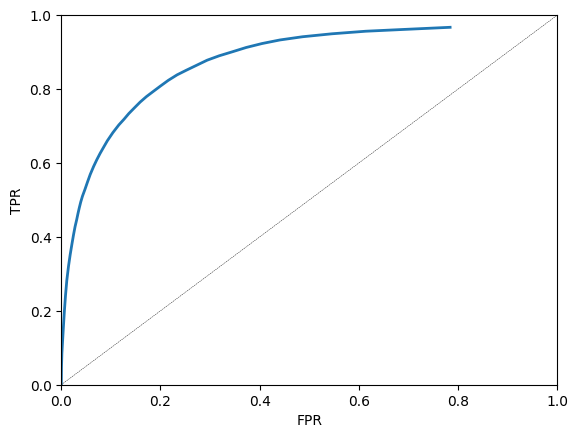

In [24]:
plt.plot(fpr, tpr, lw=2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot([0,1], [0,1], c='k', ls='dashed', lw=0.3)
plt.xlim([0,1])
plt.ylim([0,1])
plt.savefig("ROC_NN.jpg")

In [25]:
auc = 0

for i in range(len(fpr)-1):
    auc += (fpr[i]-fpr[i+1])*(tpr[i]+tpr[i+1])/2
    
print(auc)

0.6646241537401514


0.3061224489795918


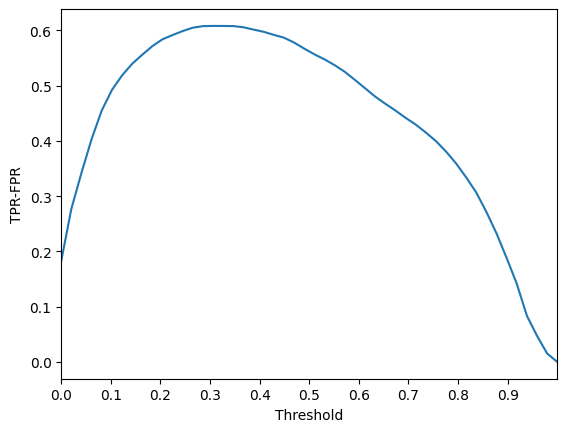

In [26]:
umbral=np.linspace(0.0, 1.0, 50)

plt.plot(umbral, np.array(tpr)-np.array(fpr))
plt.xlim([0, 1])
_ = plt.xticks(np.arange(0.0, 1.0, 0.1))
plt.xlabel('Threshold')
plt.ylabel('TPR-FPR')
plt.savefig("Umbral_NN.jpg")

Diff=np.array(tpr)-np.array(fpr)
print(umbral[np.argmax(Diff)])

0.8571428571428571


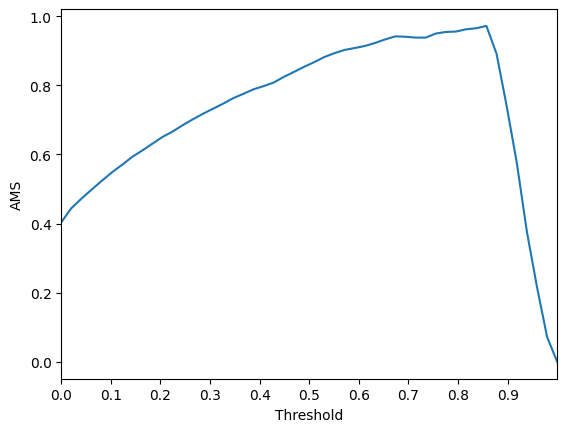

In [27]:
n_s = []
n_b = []
weights=df_train["Weight"]
for threshold in np.linspace(0.0, 1.0, 50):
    s = 0
    b = 0
    for i in range(len(resultsNN)):
        if resultsNN[i] > threshold: # Point identified as signal
            if Y_train.loc[i] == 1: # It was really signal (true positive)
                s += weights.loc[i]
            else: # it was actually background
                b += weights.loc[i]
    n_s.append(s)
    n_b.append(b)
AMS = []
for i in range(50):
    AMS.append(np.sqrt(2)*np.sqrt((n_s[i]+n_b[i]+10)*np.log(1+n_s[i]/(n_b[i]+10))-n_s[i]) )

umbral=np.linspace(0.0, 1.0, 50)
plt.plot(umbral, AMS)
plt.xlim([0, 1])
_ = plt.xticks(np.arange(0.0, 1.0, 0.1))
plt.xlabel('Threshold')
plt.ylabel('AMS')
plt.savefig("AMS_NN.jpg")

print(umbral[np.argmax(AMS)])


In [28]:
class HiggsDataSetTree():
    def __init__(self, split=0.8):
        self.X = X_train[features]
        self.Y = Y_train
        self.split = split
        self.idx_tr = range(int(split*len(self)))
        self.idx_val = range(int(split*len(self)), len(self))
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx]
    def train_split(self):
        # Shuffles the data for the training/validation split
        idx = random.sample(range(len(self)), len(self))
        self.idx_tr = idx[:int(self.split*len(self))]
        self.idx_val = idx[int(self.split*len(self)):]
    def train_data(self):
        return xgboost.DMatrix(self.X.loc[self.idx_tr], self.Y.loc[self.idx_tr])
    def val_data(self):
        return xgboost.DMatrix(self.X.loc[self.idx_val], self.Y.loc[self.idx_val])

In [29]:

Higgsset2=HiggsDataSetTree()
Higgsset2.train_split()
d_eval={}
xb = xgboost.train({'nthread': 12, 'max_depth': 10}, Higgsset2.train_data(), 300, evals=[(Higgsset2.train_data(), 'train'), (Higgsset2.val_data(), 'val')], evals_result=d_eval)

[0]	train-rmse:0.41383	val-rmse:0.41455
[1]	train-rmse:0.37873	val-rmse:0.38080
[2]	train-rmse:0.35824	val-rmse:0.36180
[3]	train-rmse:0.34641	val-rmse:0.35133
[4]	train-rmse:0.33885	val-rmse:0.34526
[5]	train-rmse:0.33423	val-rmse:0.34176
[6]	train-rmse:0.33106	val-rmse:0.33976
[7]	train-rmse:0.32877	val-rmse:0.33845
[8]	train-rmse:0.32674	val-rmse:0.33755
[9]	train-rmse:0.32502	val-rmse:0.33696
[10]	train-rmse:0.32360	val-rmse:0.33653
[11]	train-rmse:0.32185	val-rmse:0.33603
[12]	train-rmse:0.32067	val-rmse:0.33575
[13]	train-rmse:0.31985	val-rmse:0.33557
[14]	train-rmse:0.31893	val-rmse:0.33537
[15]	train-rmse:0.31797	val-rmse:0.33528
[16]	train-rmse:0.31743	val-rmse:0.33523
[17]	train-rmse:0.31647	val-rmse:0.33517
[18]	train-rmse:0.31598	val-rmse:0.33512
[19]	train-rmse:0.31529	val-rmse:0.33513
[20]	train-rmse:0.31453	val-rmse:0.33511
[21]	train-rmse:0.31373	val-rmse:0.33511
[22]	train-rmse:0.31340	val-rmse:0.33514
[23]	train-rmse:0.31279	val-rmse:0.33517
[24]	train-rmse:0.31191	va

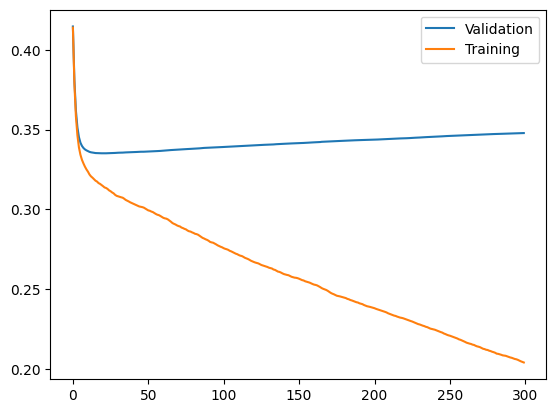

In [30]:
plt.plot(d_eval['val']['rmse'], label='Validation')
plt.plot(d_eval['train']['rmse'], label='Training')
plt.legend()
plt.savefig("Overfitting_Tree.jpg")

[0]	train-rmse:0.41383	val-rmse:0.41455
[1]	train-rmse:0.37873	val-rmse:0.38080
[2]	train-rmse:0.35824	val-rmse:0.36180
[3]	train-rmse:0.34641	val-rmse:0.35133
[4]	train-rmse:0.33885	val-rmse:0.34526
[5]	train-rmse:0.33423	val-rmse:0.34176
[6]	train-rmse:0.33106	val-rmse:0.33976
[7]	train-rmse:0.32877	val-rmse:0.33845
[8]	train-rmse:0.32674	val-rmse:0.33755
[9]	train-rmse:0.32502	val-rmse:0.33696
[10]	train-rmse:0.32360	val-rmse:0.33653
[11]	train-rmse:0.32185	val-rmse:0.33603
[12]	train-rmse:0.32067	val-rmse:0.33575
[13]	train-rmse:0.31985	val-rmse:0.33557
[14]	train-rmse:0.31893	val-rmse:0.33537
[15]	train-rmse:0.31797	val-rmse:0.33528
[16]	train-rmse:0.31743	val-rmse:0.33523
[17]	train-rmse:0.31647	val-rmse:0.33517
[18]	train-rmse:0.31598	val-rmse:0.33512
[19]	train-rmse:0.31529	val-rmse:0.33513
[20]	train-rmse:0.31453	val-rmse:0.33511
[21]	train-rmse:0.31373	val-rmse:0.33511
[22]	train-rmse:0.31340	val-rmse:0.33514
[23]	train-rmse:0.31279	val-rmse:0.33517
[24]	train-rmse:0.31191	va

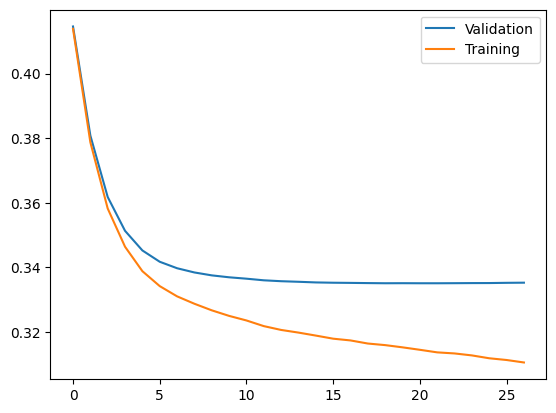

In [31]:
d_eval={}
xb = xgboost.train({'nthread': 12, 'max_depth': 10}, Higgsset2.train_data(), 300, evals=[(Higgsset2.train_data(), 'train'), (Higgsset2.val_data(), 'val')], evals_result=d_eval, early_stopping_rounds=5)
plt.plot(d_eval['val']['rmse'], label='Validation')
plt.plot(d_eval['train']['rmse'], label='Training')
plt.legend()
plt.savefig("Overfitting_Tree_earlystopping.jpg")

In [32]:
print(X_train.columns)
print(X_train['DER_mass_MMC'])

def xb_prediction(C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,C15,C16,C17,C18,C19,C20,C21,C22,C23,C24,C25,C26,C27,C28,C29,C30):
    return xb.predict(xgboost.DMatrix(pd.DataFrame({'DER_mass_MMC':[C1], 'DER_mass_transverse_met_lep':[C2],'DER_mass_vis':[C3],'DER_pt_h':[C4],'DER_deltaeta_jet_jet':[C5],'DER_mass_jet_jet':[C6],'DER_prodeta_jet_jet':[C7],'DER_deltar_tau_lep':[C8],'DER_pt_tot':[C9],'DER_sum_pt':[C10],'DER_pt_ratio_lep_tau':[C11],'DER_met_phi_centrality':[C12],'DER_lep_eta_centrality':[C13],'PRI_tau_pt':[C14],'PRI_tau_eta':[C15],'PRI_tau_phi':[C16],'PRI_lep_pt':[C17],'PRI_lep_eta':[C18],'PRI_lep_phi':[C19],'PRI_met':[C20],'PRI_met_phi':[C21],'PRI_met_sumet':[C22],'PRI_jet_num':[C23],'PRI_jet_leading_pt':[C24],'PRI_jet_leading_eta':[C25],'PRI_jet_leading_phi':[C26],'PRI_jet_subleading_pt':[C27],'PRI_jet_subleading_eta':[C28],'PRI_jet_subleading_phi':[C29],'PRI_jet_all_pt':[C30]})))[0]

Index(['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis',
       'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt'],
      dtype='object')
0         138.470
1         160.937
2        -999.000
3         143.905
4         175.864
           ...   
818233    105.668
818234     99.294
818235    108.497
818236     96.711
818237     92.373
Name: DER_mass_MMC, Length: 818238, dtype: float64


In [33]:
resultsXGB=[0]*int(len(Y_train)*0.1)
for i in range(len(resultsXGB)):
    resultsXGB[i]=xb_prediction(X_train['DER_mass_MMC'][i],X_train['DER_mass_transverse_met_lep'][i],X_train['DER_mass_vis'][i],X_train['DER_pt_h'][i],X_train['DER_deltaeta_jet_jet'][i],X_train['DER_mass_jet_jet'][i],X_train['DER_prodeta_jet_jet'][i],X_train['DER_deltar_tau_lep'][i],X_train['DER_pt_tot'][i],X_train['DER_sum_pt'][i],X_train['DER_pt_ratio_lep_tau'][i],X_train['DER_met_phi_centrality'][i],X_train['DER_lep_eta_centrality'][i],X_train['PRI_tau_pt'][i],X_train['PRI_tau_eta'][i],X_train['PRI_tau_phi'][i],X_train['PRI_lep_pt'][i],X_train['PRI_lep_eta'][i],X_train['PRI_lep_phi'][i],X_train['PRI_met'][i],X_train['PRI_met_phi'][i],X_train['PRI_met_sumet'][i],X_train['PRI_jet_num'][i],X_train['PRI_jet_leading_pt'][i],X_train['PRI_jet_leading_eta'][i],X_train['PRI_jet_leading_phi'][i],X_train['PRI_jet_subleading_pt'][i],X_train['PRI_jet_subleading_eta'][i],X_train['PRI_jet_subleading_phi'][i],X_train['PRI_jet_all_pt'][i])
    



In [34]:
print(len(resultsXGB))

81823


In [35]:
fpr = []
tpr = []
num_s = 0
num_b = 0
for i in range(len(resultsXGB)):
    if Y_train.loc[i]==1:
        num_s += 1
    else:
        num_b += 1
print(num_s, num_b)
for threshold in np.linspace(0.0, 1.0, 50):
    tp = 0
    fp = 0
    for i in range(len(resultsXGB)):
        if resultsXGB[i] > threshold: # Event identified as signal
            if Y_train.loc[i] == 1: # It was really signal (true positive)
                tp += 1
            else: # It was actually background
                fp += 1

    tpr.append(tp/num_s)
    fpr.append(fp/num_b)

27951 53872


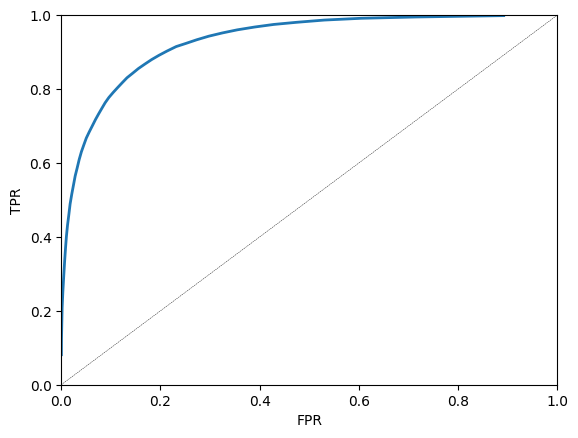

In [36]:
plt.plot(fpr, tpr, lw=2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot([0,1], [0,1], c='k', ls='dashed', lw=0.3)
plt.xlim([0,1])
plt.ylim([0,1])
plt.savefig("ROC_Tree.jpg")

In [37]:
auc = 0

for i in range(len(fpr)-1):
    auc += (fpr[i]-fpr[i+1])*(tpr[i]+tpr[i+1])/2
    
print(auc)

0.8214466375254449


0.3469387755102041


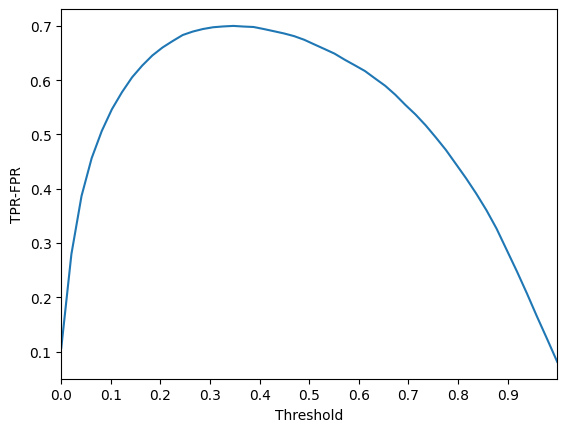

In [38]:
umbral=np.linspace(0.0, 1.0, 50)
plt.plot(umbral, np.array(tpr)-np.array(fpr))
plt.xlim([0, 1])
_ = plt.xticks(np.arange(0.0, 1.0, 0.1))
plt.xlabel('Threshold')
plt.ylabel('TPR-FPR')
plt.savefig("Umbral_Tree.jpg")
Diff=np.array(tpr)-np.array(fpr)
print(umbral[np.argmax(Diff)])

0.7755102040816326


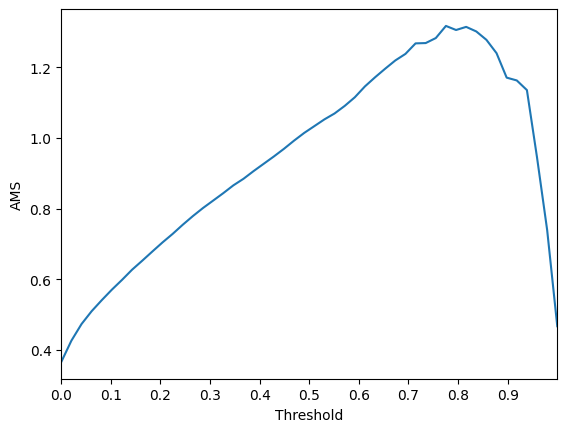

In [39]:
n_s = []
n_b = []
weights=df_train["Weight"]
for threshold in np.linspace(0.0, 1.0, 50):
    s = 0
    b = 0
    for i in range(len(resultsXGB)):
        if resultsXGB[i] > threshold: # Point identified as signal
            if Y_train.loc[i] == 1: # It was really signal (true positive)
                s += weights.loc[i]
            else: # it was actually background
                b += weights.loc[i]
    n_s.append(s)
    n_b.append(b)
AMS = []
for i in range(50):
    AMS.append(np.sqrt(2)*np.sqrt((n_s[i]+n_b[i]+10)*np.log(1+n_s[i]/(n_b[i]+10))-n_s[i]) )

umbral=np.linspace(0.0, 1.0, 50)
plt.plot(umbral, AMS)
plt.xlim([0, 1])
_ = plt.xticks(np.arange(0.0, 1.0, 0.1))
plt.xlabel('Threshold')
plt.ylabel('AMS')
plt.savefig("AMS_Tree.jpg")

print(umbral[np.argmax(AMS)])


[-0.09357843 -0.02388737 -0.06671348 ...  0.1621612  -0.00405615
 -0.01642723]


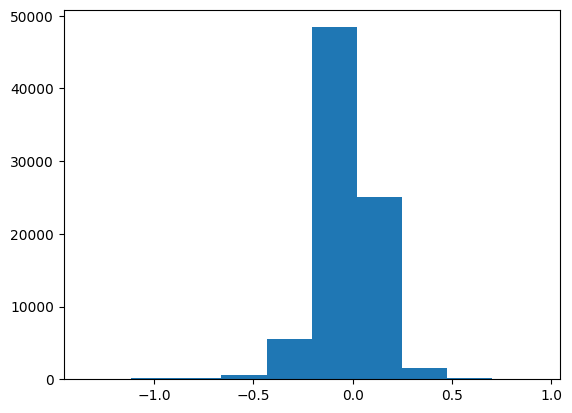

In [40]:
diferencia=np.empty(len(resultsXGB))
for i in range(len(diferencia)):
    diferencia[i]=resultsNN[i]-resultsXGB[i] 
print(diferencia)
fig,ax=plt.subplots()
ax.hist(diferencia)
plt.savefig("Diff.jpg")

Modelo combinado (media aritmetica)

27951 53872
0.8648389984724103


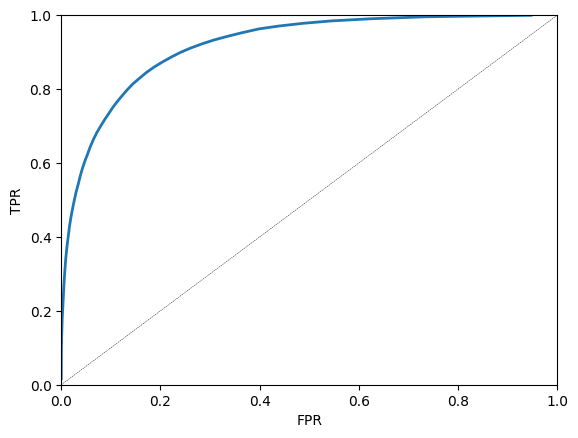

In [41]:
results_comb=np.empty(len(resultsXGB))
for i in range(len(results_comb)):
    results_comb[i]=(resultsNN[i]+resultsXGB[i])/2 
fpr = []
tpr = []
num_s = 0
num_b = 0
for i in range(len(results_comb)):
    if Y_train.loc[i]==1:
        num_s += 1
    else:
        num_b += 1
print(num_s, num_b)
for threshold in np.linspace(0.0, 1.0, 50):
    tp = 0
    fp = 0
    for i in range(len(results_comb)):
        if results_comb[i] > threshold: # Event identified as signal
            if Y_train.loc[i] == 1: # It was really signal (true positive)
                tp += 1
            else: # It was actually background
                fp += 1

    tpr.append(tp/num_s)
    fpr.append(fp/num_b)

plt.plot(fpr, tpr, lw=2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot([0,1], [0,1], c='k', ls='dashed', lw=0.3)
plt.xlim([0,1])
plt.ylim([0,1])
plt.savefig("ROC_comb.jpg")

auc = 0

for i in range(len(fpr)-1):
    auc += (fpr[i]-fpr[i+1])*(tpr[i]+tpr[i+1])/2
    
print(auc)

0.32653061224489793


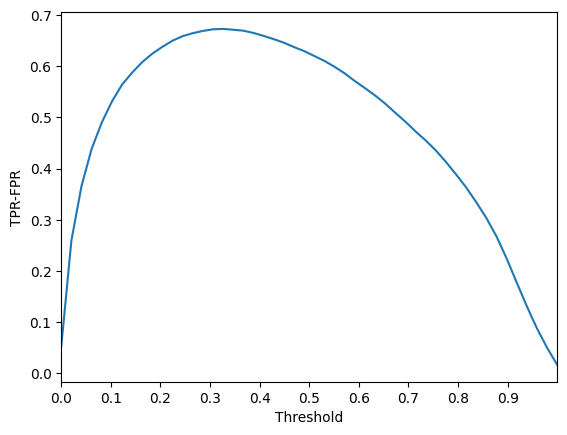

In [42]:

umbral=np.linspace(0.0, 1.0, 50)
plt.plot(umbral, np.array(tpr)-np.array(fpr))
plt.xlim([0, 1])
_ = plt.xticks(np.arange(0.0, 1.0, 0.1))
plt.xlabel('Threshold')
plt.ylabel('TPR-FPR')
plt.savefig("Umbral_comb.jpg")

Diff=np.array(tpr)-np.array(fpr)
print(umbral[np.argmax(Diff)])

0.836734693877551


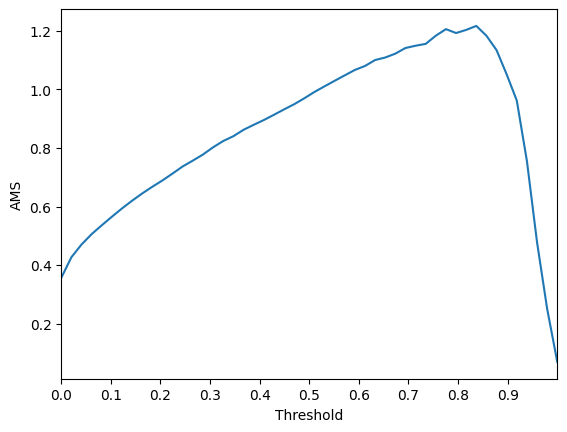

In [43]:
n_s = []
n_b = []
weights=df_train["Weight"]
for threshold in np.linspace(0.0, 1.0, 50):
    s = 0
    b = 0
    for i in range(len(results_comb)):
        if results_comb[i] > threshold: # Point identified as signal
            if Y_train.loc[i] == 1: # It was really signal (true positive)
                s += weights.loc[i]
            else: # it was actually background
                b += weights.loc[i]
    n_s.append(s)
    n_b.append(b)
AMS = []
for i in range(50):
    AMS.append(np.sqrt(2)*np.sqrt((n_s[i]+n_b[i]+10)*np.log(1+n_s[i]/(n_b[i]+10))-n_s[i]) )

umbral=np.linspace(0.0, 1.0, 50)
plt.plot(umbral, AMS)
plt.xlim([0, 1])
_ = plt.xticks(np.arange(0.0, 1.0, 0.1))
plt.xlabel('Threshold')
plt.ylabel('AMS')
plt.savefig("AMS_comb.jpg")

print(umbral[np.argmax(AMS)])


Modelo combinado (media pesada)

27951 53872
0.864393099229286


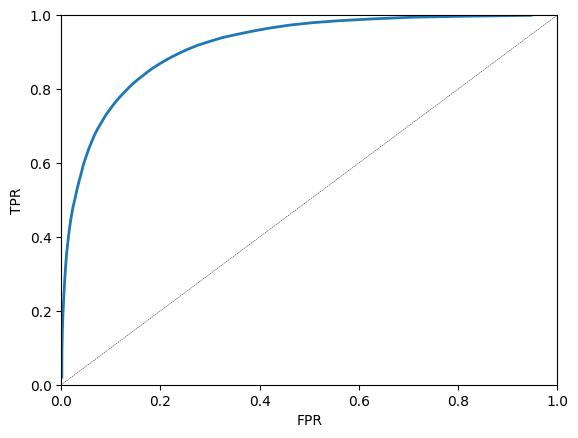

In [44]:
results_comb=np.empty(len(resultsXGB))
for i in range(len(results_comb)):
    results_comb[i]=resultsNN[i]*(resultsNN[i]/(resultsNN[i]+resultsXGB[i]))+resultsXGB[i]*((resultsXGB[i])/(resultsNN[i]+resultsXGB[i]))
fpr = []
tpr = []
num_s = 0
num_b = 0
for i in range(len(results_comb)):
    if Y_train.loc[i]==1:
        num_s += 1
    else:
        num_b += 1
print(num_s, num_b)
for threshold in np.linspace(0.0, 1.0, 50):
    tp = 0
    fp = 0
    for i in range(len(results_comb)):
        if results_comb[i] > threshold: # Event identified as signal
            if Y_train.loc[i] == 1: # It was really signal (true positive)
                tp += 1
            else: # It was actually background
                fp += 1

    tpr.append(tp/num_s)
    fpr.append(fp/num_b)

plt.plot(fpr, tpr, lw=2)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot([0,1], [0,1], c='k', ls='dashed', lw=0.3)
plt.xlim([0,1])
plt.ylim([0,1])
plt.savefig("ROC_comb_w.jpg")

auc = 0

for i in range(len(fpr)-1):
    auc += (fpr[i]-fpr[i+1])*(tpr[i]+tpr[i+1])/2
    
print(auc)

0.3469387755102041


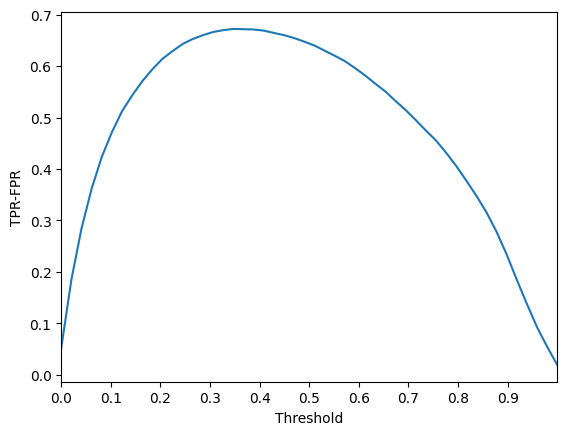

In [45]:

umbral=np.linspace(0.0, 1.0, 50)
plt.plot(umbral, np.array(tpr)-np.array(fpr))
plt.xlim([0, 1])
_ = plt.xticks(np.arange(0.0, 1.0, 0.1))
plt.xlabel('Threshold')
plt.ylabel('TPR-FPR')
plt.savefig("Umbral_comb_w.jpg")

Diff=np.array(tpr)-np.array(fpr)
print(umbral[np.argmax(Diff)])

## Resources

### Free on-line courses

* [Kaggle](https://www.kaggle.com/): Google's project for Machine Learning. It has courses, Machine Learning competitions, and you can run Jupyter notebooks with most ML libraries pre-installed, and even with GPU (limited to 30h/week).
* [ML for beginners](https://github.com/microsoft/ML-For-Beginners) course by Microsoft.

### Libraries

* [pandas](https://pandas.pydata.org/)
* [polars](https://www.pola.rs/)
* [PyTorch](https://pytorch.org/)
* [TensorFlow](https://www.tensorflow.org/)
* [Keras](https://keras.io/)
* [JAX](https://jax.readthedocs.io/en/latest/)
* [scikit-learn](https://scikit-learn.org/stable/index.html)
* [xgboost](https://xgboost.readthedocs.io/en/stable/)
* [LightGBM](https://lightgbm.readthedocs.io/en/latest/index.html)
* [CatBoost](https://catboost.ai/)
* [SHAP](https://shap.readthedocs.io/en/latest/index.html)
* [normflows](https://github.com/VincentStimper/normalizing-flows)
* [Hugging face / transformers](https://huggingface.co/)